In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [14]:
df = pd.read_csv("../pytorch/data/iris.csv")
df.info()
print("----------------------------------------")
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
----------------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            .

In [15]:
data = pd.get_dummies(df, columns=["Species"])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [16]:
x, y = train_test_split(data, test_size=0.2, random_state=123)

In [17]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [19]:
x = torch.from_numpy(x_scaled)
y = torch.from_numpy(y_scaled)

In [20]:
print(x.size())
print(y.size())
print(x)

torch.Size([120, 8])
torch.Size([30, 8])
tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00,
          1.4142e+00, -7

In [21]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance="euclidean", device=device
)

running k-means on cuda:0..


[running kmeans]: 4it [00:00, 118.66it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [22]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1,
        1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0,
        2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1,
        1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1,
        0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2])
tensor([[-1.1850, -1.0022,  0.8757, -1.3028, -1.2384,  1.4142, -0.7071, -0.7071],
        [-0.0063,  0.1292, -0.6246,  0.2742,  0.1631, -0.7071,  1.4142, -0.7071],
        [ 1.1509,  0.9013, -0.2199,  1.0354,  1.0906, -0.7071, -0.7071,  1.4142]])


In [23]:
cluster_ids_y = kmeans_predict(
    y, cluster_centers, "euclidean", device=device
)

predicting on cuda:0..


In [24]:
print(cluster_ids_y)

tensor([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2,
        0, 0, 0, 2, 2, 0])


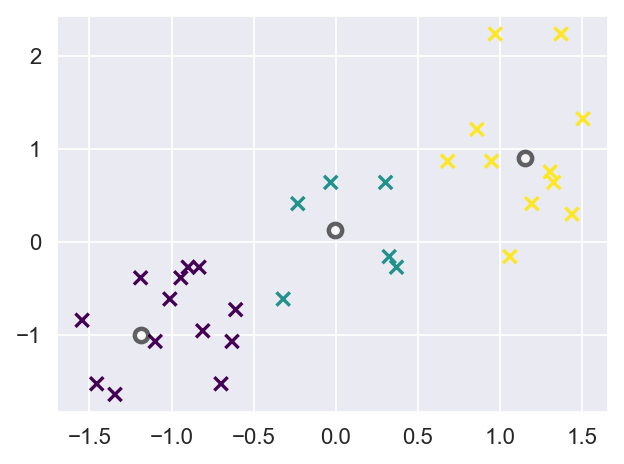

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap="viridis", marker="x")

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c="white",
    alpha=0.6,
    edgecolors="black",
    linewidths=2
)

plt.tight_layout()
plt.show()